In [8]:
from mp_api.client import MPRester
from data.utils import process_material
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("./calibration.csv", delimiter='\t', header=None)
df.columns = ["angles", "coordinate", "experimental", "loop intensity", "calculated", "intensity"]
df.head()

,angles,coordinate,experimental,loop intensity,calculated,intensity
0,9.000844,6.26402,2.564171,2.564171,0.399552,0.0
1,9.002554,3.00000,2.564254,2.564254,0.577350,0.0
2,9.004264,4.01381,2.564337,2.564337,0.499139,0.0
3,9.005974,7.22006,2.564420,2.564420,0.372160,0.0
4,9.007684,2.00000,2.564503,2.564503,0.707107,0.0


In [3]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from mp_api.client import MPRester

In [1]:
from data.utils import process_material

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

array([ 9.81833411,  9.8983649 ,  9.97839569, 10.05842648, 10.13845728,
       10.21848807, 10.29851886, 10.37854966, 10.45858045, 10.53861124,
       10.61864204, 10.69867283, 10.77870362, 10.85873442, 10.93876521,
       11.018796  , 11.09882679, 11.17885759, 11.25888838, 11.33891917,
       11.41894997, 11.49898076, 11.57901155, 11.65904235, 11.73907314,
       11.81910393, 11.89913473, 11.97916552, 12.05919631, 12.1392271 ,
       12.2192579 , 12.29928869, 12.37931948, 12.45935028, 12.53938107,
       12.61941186, 12.69944266, 12.77947345, 12.85950424, 12.93953504,
       13.01956583, 13.09959662, 13.17962741, 13.25965821, 13.339689  ,
       13.41971979, 13.49975059, 13.57978138, 13.65981217, 13.73984297,
       13.81987376, 13.89990455, 13.97993534, 14.05996614, 14.13999693,
       14.22002772, 14.30005852, 14.38008931, 14.4601201 , 14.5401509 ,
       14.62018169, 14.70021248, 14.78024328, 14.86027407, 14.94030486,
       15.02033565, 15.10036645, 15.18039724, 15.26042803, 15.34

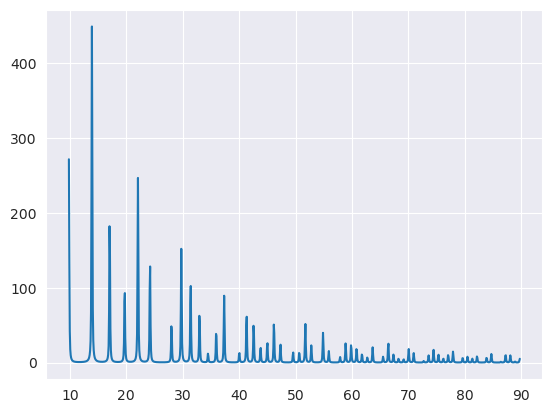

In [9]:
with MPRester(api_key="bo70Q5XVKyZdImV77bFXHO2cDKdvVQ6F") as mpr:
    # first retrieve the relevant structure
    structure = mpr.get_structure_by_material_id("mp-2680")

# important to use the conventional structure to ensure
# that peaks are labelled with the conventional Miller indices
sga = SpacegroupAnalyzer(structure)
conventional_structure = sga.get_conventional_standard_structure()

/home/bellache/anaconda3/envs/XRD/lib/python3.10/site-packages/mp_api/client/mprester.py:182: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
pattern = process_material("mp-2680", "bo70Q5XVKyZdImV77bFXHO2cDKdvVQ6F", 0.05, 0.01, 0.721)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
pattern = pattern["XRD Pattern"]

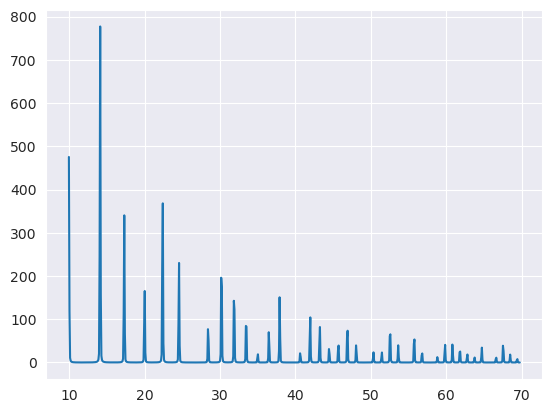

In [29]:
plt.plot(pattern[1][:-250], pattern[0][:-250])

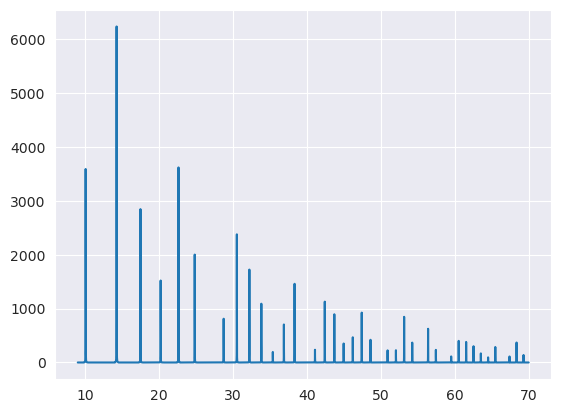